## Comparing descriptives of different periods for one particular date

* Very ugly coding

In [1]:
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
import datetime as dt
import time
from RunSilentlyDailyEtapasBuilder import RunSilentlyDailyEtapasBuilderClass
from matplotlib.dates import date2num

In [2]:
import scipy as sp
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t.ppf((1+confidence)/2., n-1)
    return h, m-h, m, m+h

In [3]:
dates = ['2017-07-19'] #Only one date

In [4]:
#Nocturnal descriptives
noc_turnstile_means = []
noc_turnstile_means_errors = []
noc_turnstile_medians = []
noc_turnstile_stds = []
noc_turnstile_maxs = []

noc_no_turnstile_means = []
noc_no_turnstile_means_errors = []
noc_no_turnstile_medians = []
noc_no_turnstile_stds = []
noc_no_turnstile_maxs = []

#Diurnal descriptives
diur_turnstile_means = []
diur_turnstile_means_errors = []
diur_turnstile_medians = []
diur_turnstile_stds = []
diur_turnstile_maxs = []

diur_no_turnstile_means = []
diur_no_turnstile_means_errors = []
diur_no_turnstile_medians = []
diur_no_turnstile_stds = []
diur_no_turnstile_maxs = []

#Off-peak descriptives
off_peak_turnstile_means = []
off_peak_turnstile_means_errors = []
off_peak_turnstile_medians = []
off_peak_turnstile_stds = []
off_peak_turnstile_maxs = []

off_peak_no_turnstile_means = []
off_peak_no_turnstile_means_errors = []
off_peak_no_turnstile_medians = []
off_peak_no_turnstile_stds = []
off_peak_no_turnstile_maxs = []

#Peak descriptives
peak_turnstile_means = []
peak_turnstile_means_errors = []
peak_turnstile_medians = []
peak_turnstile_stds = []
peak_turnstile_maxs = []

peak_no_turnstile_means = []
peak_no_turnstile_means_errors = []
peak_no_turnstile_medians = []
peak_no_turnstile_stds = []
peak_no_turnstile_maxs = []

quantile = 0.97   

* Filtering by diurnal vs. nocturnal

In [5]:
diur_start_1 = dt.time(0,0,0)
diur_end_1 = dt.time(0,59,0)
noc_start = dt.time(1,0,0)
noc_end = dt.time(5,29,0)
diur_start_2 = dt.time(5,30,0)
diur_end_2 = dt.time(23,59,0)

* Filtering by peak vs. off-peak

In [6]:
off_peak_start_1 = dt.time(0,0,0)
off_peak_end_1 = dt.time(6,29,0)

peak_start_1 = dt.time(6,30,0)
peak_end_1 = dt.time(8,29,0)

off_peak_start_2 = dt.time(8,30,0)
off_peak_end_2 = dt.time(17,29,0)

peak_start_2 = dt.time(17,30,0)
peak_end_2 = dt.time(20,29,0)

off_peak_start_3 = dt.time(20,30,0)
off_peak_end_3 = dt.time(23,59,0)

In [7]:
for date in dates:
    etapas_builder = RunSilentlyDailyEtapasBuilderClass(date)
    [etapas_df, processed_sorted_df, filtered_df, filtered_turnstile_df, filtered_no_turnstile_df]=etapas_builder.runCompleteProcess()
    
    #Filtering by diurnal vs. nocturnal
    noc_turnstile_df = filtered_turnstile_df[(noc_start<=filtered_turnstile_df['t_subida'].dt.time)&(filtered_turnstile_df['t_subida'].dt.time<=noc_end)]

    noc_no_turnstile_df = filtered_no_turnstile_df[(noc_start<=filtered_no_turnstile_df['t_subida'].dt.time)&(filtered_no_turnstile_df['t_subida'].dt.time<=noc_end)]

    diur_turnstile_df = filtered_turnstile_df[((diur_start_1<=filtered_turnstile_df['t_subida'].dt.time)&(filtered_turnstile_df['t_subida'].dt.time<=diur_end_1))
                                         |((diur_start_2<=filtered_turnstile_df['t_subida'].dt.time)&(filtered_turnstile_df['t_subida'].dt.time<=diur_end_2))]

    diur_no_turnstile_df = filtered_no_turnstile_df[((diur_start_1<=filtered_no_turnstile_df['t_subida'].dt.time)&(filtered_no_turnstile_df['t_subida'].dt.time<=diur_end_1))
                                         |((diur_start_2<=filtered_no_turnstile_df['t_subida'].dt.time)&(filtered_no_turnstile_df['t_subida'].dt.time<=diur_end_2))]
    
    #Filtering by peak vs. off-peak
    off_peak_turnstile_df = filtered_turnstile_df[((off_peak_start_1<=filtered_turnstile_df['t_subida'].dt.time)&(filtered_turnstile_df['t_subida'].dt.time<=off_peak_end_1))
                                                  |((off_peak_start_2<=filtered_turnstile_df['t_subida'].dt.time)&(filtered_turnstile_df['t_subida'].dt.time<=off_peak_end_2))
                                                  |((off_peak_start_3<=filtered_turnstile_df['t_subida'].dt.time)&(filtered_turnstile_df['t_subida'].dt.time<=off_peak_end_3))]

    off_peak_no_turnstile_df = filtered_no_turnstile_df[((off_peak_start_1<=filtered_no_turnstile_df['t_subida'].dt.time)&(filtered_no_turnstile_df['t_subida'].dt.time<=off_peak_end_1))
                                               |((off_peak_start_2<=filtered_no_turnstile_df['t_subida'].dt.time)&(filtered_no_turnstile_df['t_subida'].dt.time<=off_peak_end_2))
                                               |((off_peak_start_3<=filtered_no_turnstile_df['t_subida'].dt.time)&(filtered_no_turnstile_df['t_subida'].dt.time<=off_peak_end_3))]

    peak_turnstile_df = filtered_turnstile_df[((peak_start_1<=filtered_turnstile_df['t_subida'].dt.time)&(filtered_turnstile_df['t_subida'].dt.time<=peak_end_1))
                                           |((peak_start_2<=filtered_turnstile_df['t_subida'].dt.time)&(filtered_turnstile_df['t_subida'].dt.time<=peak_end_2))]

    peak_no_turnstile_df = filtered_no_turnstile_df[((peak_start_1<=filtered_no_turnstile_df['t_subida'].dt.time)&(filtered_no_turnstile_df['t_subida'].dt.time<=peak_end_1))
                                           |((peak_start_2<=filtered_no_turnstile_df['t_subida'].dt.time)&(filtered_no_turnstile_df['t_subida'].dt.time<=peak_end_2))]
    
    #Diurnal vs. nocturnal quantiles
    noc_turnstile_97 = noc_turnstile_df.diferencia_tiempo.quantile(0.97)
    noc_no_turnstile_97 = noc_no_turnstile_df.diferencia_tiempo.quantile(0.97)
    diur_turnstile_97 = diur_turnstile_df.diferencia_tiempo.quantile(0.97)
    diur_no_turnstile_97 = diur_no_turnstile_df.diferencia_tiempo.quantile(0.97)
    #Peak vs. off-peak quantiles
    off_peak_turnstile_97 = off_peak_turnstile_df.diferencia_tiempo.quantile(0.97)
    off_peak_no_turnstile_97 = off_peak_no_turnstile_df.diferencia_tiempo.quantile(0.97)
    peak_turnstile_97 = peak_turnstile_df.diferencia_tiempo.quantile(0.97)
    peak_no_turnstile_97 = peak_no_turnstile_df.diferencia_tiempo.quantile(0.97)
    
    #Filtering diurnal and nocturnal for specific quantile
    noc_turnstile_97_df = noc_turnstile_df[noc_turnstile_df.diferencia_tiempo<=noc_turnstile_97]
    noc_no_turnstile_97_df = noc_no_turnstile_df[noc_no_turnstile_df.diferencia_tiempo<=noc_no_turnstile_97]
    diur_turnstile_97_df = diur_turnstile_df[diur_turnstile_df.diferencia_tiempo<=diur_turnstile_97]
    diur_no_turnstile_97_df = diur_no_turnstile_df[diur_no_turnstile_df.diferencia_tiempo<=diur_no_turnstile_97]
    #Filtering peak and off-peak for specific quantile
    off_peak_turnstile_97_df = off_peak_turnstile_df[off_peak_turnstile_df.diferencia_tiempo<=off_peak_turnstile_97]
    off_peak_no_turnstile_97_df = off_peak_no_turnstile_df[off_peak_no_turnstile_df.diferencia_tiempo<=off_peak_no_turnstile_97]
    peak_turnstile_97_df = peak_turnstile_df[peak_turnstile_df.diferencia_tiempo<=peak_turnstile_97]
    peak_no_turnstile_97_df = peak_no_turnstile_df[peak_no_turnstile_df.diferencia_tiempo<=peak_no_turnstile_97]
    
    #Getting the important info.: diurnal vs. nocturnal
    noc_turnstile_means.append(noc_turnstile_97_df['diferencia_tiempo_secs'].mean())
    noc_turnstile_means_errors.append(mean_confidence_interval(noc_turnstile_97_df['diferencia_tiempo_secs'])[0])
    noc_turnstile_stds.append(noc_turnstile_97_df['diferencia_tiempo_secs'].std())    
    noc_turnstile_medians.append(noc_turnstile_97_df['diferencia_tiempo_secs'].quantile(0.50))
    noc_turnstile_maxs.append(noc_turnstile_97_df['diferencia_tiempo_secs'].max())
    
    noc_no_turnstile_means.append(noc_no_turnstile_97_df['diferencia_tiempo_secs'].mean())
    noc_no_turnstile_means_errors.append(mean_confidence_interval(noc_no_turnstile_97_df['diferencia_tiempo_secs'])[0])
    noc_no_turnstile_stds.append(noc_no_turnstile_97_df['diferencia_tiempo_secs'].std())    
    noc_no_turnstile_medians.append(noc_no_turnstile_97_df['diferencia_tiempo_secs'].quantile(0.50))
    noc_no_turnstile_maxs.append(noc_no_turnstile_97_df['diferencia_tiempo_secs'].max())
    
    diur_turnstile_means.append(diur_turnstile_97_df['diferencia_tiempo_secs'].mean())
    diur_turnstile_means_errors.append(mean_confidence_interval(diur_turnstile_97_df['diferencia_tiempo_secs'])[0])
    diur_turnstile_stds.append(diur_turnstile_97_df['diferencia_tiempo_secs'].std())
    diur_turnstile_medians.append(diur_turnstile_97_df['diferencia_tiempo_secs'].quantile(0.50))
    diur_turnstile_maxs.append(diur_turnstile_97_df['diferencia_tiempo_secs'].max())
    
    diur_no_turnstile_means.append(diur_no_turnstile_97_df['diferencia_tiempo_secs'].mean())
    diur_no_turnstile_means_errors.append(mean_confidence_interval(diur_no_turnstile_97_df['diferencia_tiempo_secs'])[0])
    diur_no_turnstile_stds.append(diur_no_turnstile_97_df['diferencia_tiempo_secs'].std())
    diur_no_turnstile_medians.append(diur_no_turnstile_97_df['diferencia_tiempo_secs'].quantile(0.50))
    diur_no_turnstile_maxs.append(diur_no_turnstile_97_df['diferencia_tiempo_secs'].max())
    
    #Getting the important info.: peak vs. off-peak    
    off_peak_turnstile_means.append(off_peak_turnstile_97_df['diferencia_tiempo_secs'].mean())
    off_peak_turnstile_means_errors.append(mean_confidence_interval(off_peak_turnstile_97_df['diferencia_tiempo_secs'])[0])
    off_peak_turnstile_stds.append(off_peak_turnstile_97_df['diferencia_tiempo_secs'].std())    
    off_peak_turnstile_medians.append(off_peak_turnstile_97_df['diferencia_tiempo_secs'].quantile(0.50))
    off_peak_turnstile_maxs.append(off_peak_turnstile_97_df['diferencia_tiempo_secs'].max())
    
    off_peak_no_turnstile_means.append(off_peak_no_turnstile_97_df['diferencia_tiempo_secs'].mean())
    off_peak_no_turnstile_means_errors.append(mean_confidence_interval(off_peak_no_turnstile_97_df['diferencia_tiempo_secs'])[0])
    off_peak_no_turnstile_stds.append(off_peak_no_turnstile_97_df['diferencia_tiempo_secs'].std())    
    off_peak_no_turnstile_medians.append(off_peak_no_turnstile_97_df['diferencia_tiempo_secs'].quantile(0.50))
    off_peak_no_turnstile_maxs.append(off_peak_no_turnstile_97_df['diferencia_tiempo_secs'].max())
    
    peak_turnstile_means.append(peak_turnstile_97_df['diferencia_tiempo_secs'].mean())
    peak_turnstile_means_errors.append(mean_confidence_interval(peak_turnstile_97_df['diferencia_tiempo_secs'])[0])
    peak_turnstile_stds.append(peak_turnstile_97_df['diferencia_tiempo_secs'].std())
    peak_turnstile_medians.append(peak_turnstile_97_df['diferencia_tiempo_secs'].quantile(0.50))
    peak_turnstile_maxs.append(peak_turnstile_97_df['diferencia_tiempo_secs'].max())
    
    peak_no_turnstile_means.append(peak_no_turnstile_97_df['diferencia_tiempo_secs'].mean())
    peak_no_turnstile_means_errors.append(mean_confidence_interval(peak_no_turnstile_97_df['diferencia_tiempo_secs'])[0])
    peak_no_turnstile_stds.append(peak_no_turnstile_97_df['diferencia_tiempo_secs'].std())
    peak_no_turnstile_medians.append(peak_no_turnstile_97_df['diferencia_tiempo_secs'].quantile(0.50))
    peak_no_turnstile_maxs.append(peak_no_turnstile_97_df['diferencia_tiempo_secs'].max())


Not found in turnstile database: 1637796


* Plotting

In [8]:
colors = [(85,98,112),(78,205,196),(199,244,100),(255,107,107),(196,77,88)]
for i in range(len(colors)):
    r, g, b = colors[i]  
    colors[i] = (r / 255., g / 255., b / 255.)

width = 0.5

* Plotting means

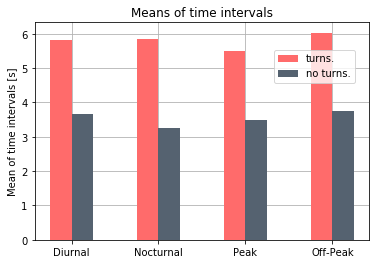

In [9]:
ind = np.arange(1,9,2)
fig_1, ax_1 = plt.subplots()

p1 = ax_1.bar(1,diur_turnstile_means,width = width, color = colors[3], zorder=3)
p2 = ax_1.bar(1+width,diur_no_turnstile_means,width = width, color = colors[0],zorder=3)

p3 = ax_1.bar(3,noc_turnstile_means, width = width, color = colors[3], zorder=3)
p4 = ax_1.bar(3+width,noc_no_turnstile_means, width = width, color = colors[0],zorder=3)

p5 = ax_1.bar(5,peak_turnstile_means, width = width, color = colors[3], zorder=3)
p6 = ax_1.bar(5+width,peak_no_turnstile_means, width = width, color = colors[0],zorder=3)

p7 = ax_1.bar(7,off_peak_turnstile_means, width = width, color = colors[3], zorder=3)
p8 = ax_1.bar(7+width,off_peak_no_turnstile_means, width = width, color = colors[0],zorder=3)

ax_1.set_xticks(ind + width / 2)
ax_1.set_xticklabels(('Diurnal', 'Nocturnal', 'Peak', 'Off-Peak'))
ax_1.set_title('Means of time intervals')
ax_1.set_ylabel('Mean of time intervals [s]')
ax_1.grid(zorder=0)

plt.legend((p1[0],p2[0]), ('turns.','no turns.'),bbox_to_anchor=(0.7, 0.7))
#plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/6_meansComparisonByPeriod.pdf')

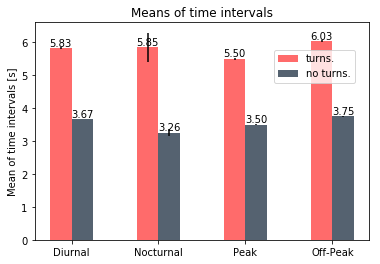

In [12]:
ind = np.arange(1,9,2)
fig_2, ax_2 = plt.subplots()

p1 = ax_2.bar(1,diur_turnstile_means,width = width, color = colors[3], yerr=diur_turnstile_means_errors)
p2 = ax_2.bar(1+width,diur_no_turnstile_means,width = width, color = colors[0], yerr=diur_no_turnstile_means_errors)

p3 = ax_2.bar(3,noc_turnstile_means, width = width, color = colors[3], yerr=noc_turnstile_means_errors)
p4 = ax_2.bar(3+width,noc_no_turnstile_means, width = width, color = colors[0], yerr=noc_no_turnstile_means_errors)

p5 = ax_2.bar(5,peak_turnstile_means, width = width, color = colors[3], yerr=peak_turnstile_means_errors)
p6 = ax_2.bar(5+width,peak_no_turnstile_means, width = width, color = colors[0], yerr=peak_no_turnstile_means_errors)

p7 = ax_2.bar(7,off_peak_turnstile_means, width = width, color = colors[3], yerr=off_peak_turnstile_means_errors)
p8 = ax_2.bar(7+width,off_peak_no_turnstile_means, width = width, color = colors[0], yerr=off_peak_no_turnstile_means_errors)

ax_2.set_xticks(ind + width / 2)
ax_2.set_xticklabels(('Diurnal', 'Nocturnal', 'Peak', 'Off-Peak'))
ax_2.set_title('Means of time intervals')
ax_2.set_ylabel('Mean of time intervals [s]')
#ax_2.grid(zorder=0)

x_labels = [0.75,1.75,2.75,3.75,4.75,5.75,6.75,7.75]

rects = ax_2.patches

labels = []

labels.append(diur_turnstile_means[0])
labels.append(diur_no_turnstile_means[0])
labels.append(noc_turnstile_means[0])
labels.append(noc_no_turnstile_means[0])
labels.append(peak_turnstile_means[0])
labels.append(peak_no_turnstile_means[0])
labels.append(off_peak_turnstile_means[0])
labels.append(off_peak_no_turnstile_means[0])

labels = [ '%.2f' % elem for elem in labels ]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax_2.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')


plt.legend((p1[0],p2[0]), ('turns.','no turns.'),bbox_to_anchor=(0.7, 0.7))
#plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/6_meansComparisonByPeriodToPPT.pdf')
plt.savefig('C:/Users/leoca_000/Desktop/Evasion/03_report/02_Figs/6_meansComparisonByPeriodToPPT.pdf')

* Plotting stds

In [ ]:
ind = np.arange(1,9,2)
fig_3, ax_3 = plt.subplots()

p1 = ax_3.bar(1,diur_turnstile_stds,width = width, color = colors[3], zorder=3)
p2 = ax_3.bar(1+width,diur_no_turnstile_stds,width = width, color = colors[0],zorder=3)

p3 = ax_3.bar(3,noc_turnstile_stds, width = width, color = colors[3], zorder=3)
p4 = ax_3.bar(3+width,noc_no_turnstile_stds, width = width, color = colors[0],zorder=3)

p5 = ax_3.bar(5,peak_turnstile_stds, width = width, color = colors[3], zorder=3)
p6 = ax_3.bar(5+width,peak_no_turnstile_stds, width = width, color = colors[0],zorder=3)

p7 = ax_3.bar(7,off_peak_turnstile_stds, width = width, color = colors[3], zorder=3)
p8 = ax_3.bar(7+width,off_peak_no_turnstile_stds, width = width, color = colors[0],zorder=3)

ax_3.set_xticks(ind + width / 2)
ax_3.set_xticklabels(('Diurnal', 'Nocturnal', 'Peak', 'Off-Peak'))
ax_3.set_title('Stds. of time intervals')
ax_3.set_ylabel('Std. of time intervals [s]')
ax_3.grid(zorder=0)

plt.legend((p1[0],p2[0]), ('turns.','no turns.'),bbox_to_anchor=(0.7, 0.7))
#plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/6_stdsComparisonByPeriod.pdf')

In [ ]:
ind = np.arange(1,9,2)
fig_4, ax_4 = plt.subplots()

p1 = ax_4.bar(1,diur_turnstile_stds,width = width, color = colors[3], zorder=3)
p2 = ax_4.bar(1+width,diur_no_turnstile_stds,width = width, color = colors[0],zorder=3)

p3 = ax_4.bar(3,noc_turnstile_stds, width = width, color = colors[3], zorder=3)
p4 = ax_4.bar(3+width,noc_no_turnstile_stds, width = width, color = colors[0],zorder=3)

p5 = ax_4.bar(5,peak_turnstile_stds, width = width, color = colors[3], zorder=3)
p6 = ax_4.bar(5+width,peak_no_turnstile_stds, width = width, color = colors[0],zorder=3)

p7 = ax_4.bar(7,off_peak_turnstile_stds, width = width, color = colors[3], zorder=3)
p8 = ax_4.bar(7+width,off_peak_no_turnstile_stds, width = width, color = colors[0],zorder=3)

x_labels = [0.75,1.75,2.75,3.75,4.75,5.75,6.75,7.75]

rects = ax_4.patches

labels = []

labels.append(diur_turnstile_stds[0])
labels.append(diur_no_turnstile_stds[0])
labels.append(noc_turnstile_stds[0])
labels.append(noc_no_turnstile_stds[0])
labels.append(peak_turnstile_stds[0])
labels.append(peak_no_turnstile_stds[0])
labels.append(off_peak_turnstile_stds[0])
labels.append(off_peak_no_turnstile_stds[0])

labels = [ '%.2f' % elem for elem in labels ]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax_4.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')

ax_4.set_xticks(ind + width / 2)
ax_4.set_xticklabels(('Diurnal', 'Nocturnal', 'Peak', 'Off-Peak'))
ax_4.set_title('Stds. of time intervals')
ax_4.set_ylabel('Std. of time intervals [s]')
ax_4.grid(zorder=0)

plt.legend((p1[0],p2[0]), ('turns.','no turns.'),bbox_to_anchor=(0.7, 0.7))
#plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/6_stdsComparisonByPeriodToPPT.pdf')

* Plotting Medians

In [ ]:
ind = np.arange(1,9,2)
fig_5, ax_5 = plt.subplots()

p1 = ax_5.bar(1,diur_turnstile_medians,width = width, color = colors[3], zorder=3)
p2 = ax_5.bar(1+width,diur_no_turnstile_medians,width = width, color = colors[0],zorder=3)

p3 = ax_5.bar(3,noc_turnstile_medians, width = width, color = colors[3], zorder=3)
p4 = ax_5.bar(3+width,noc_no_turnstile_medians, width = width, color = colors[0],zorder=3)

p5 = ax_5.bar(5,peak_turnstile_medians, width = width, color = colors[3], zorder=3)
p6 = ax_5.bar(5+width,peak_no_turnstile_medians, width = width, color = colors[0],zorder=3)

p7 = ax_5.bar(7,off_peak_turnstile_medians, width = width, color = colors[3], zorder=3)
p8 = ax_5.bar(7+width,off_peak_no_turnstile_medians, width = width, color = colors[0],zorder=3)

ax_5.set_xticks(ind + width / 2)
ax_5.set_xticklabels(('Diurnal', 'Nocturnal', 'Peak', 'Off-Peak'))
ax_5.set_title('Medians of time intervals')
ax_5.set_ylabel('Median of time intervals [s]')
ax_5.grid(zorder=0)

plt.legend((p1[0],p2[0]), ('turns.','no turns.'),bbox_to_anchor=(0.7, 0.7))
#plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/6_mediansComparisonByPeriod.pdf')

In [ ]:
ind = np.arange(1,9,2)
fig_6, ax_6 = plt.subplots()

p1 = ax_6.bar(1,diur_turnstile_medians,width = width, color = colors[3], zorder=3)
p2 = ax_6.bar(1+width,diur_no_turnstile_medians,width = width, color = colors[0],zorder=3)

p3 = ax_6.bar(3,noc_turnstile_medians, width = width, color = colors[3], zorder=3)
p4 = ax_6.bar(3+width,noc_no_turnstile_medians, width = width, color = colors[0],zorder=3)

p5 = ax_6.bar(5,peak_turnstile_medians, width = width, color = colors[3], zorder=3)
p6 = ax_6.bar(5+width,peak_no_turnstile_medians, width = width, color = colors[0],zorder=3)

p7 = ax_6.bar(7,off_peak_turnstile_medians, width = width, color = colors[3], zorder=3)
p8 = ax_6.bar(7+width,off_peak_no_turnstile_medians, width = width, color = colors[0],zorder=3)

ax_6.set_xticks(ind + width / 2)
ax_6.set_xticklabels(('Diurnal', 'Nocturnal', 'Peak', 'Off-Peak'))
ax_6.set_title('Medians of time intervals')
ax_6.set_ylabel('Median of time intervals [s]')
ax_6.grid(zorder=0)

x_labels = [0.75,1.75,2.75,3.75,4.75,5.75,6.75,7.75]

rects = ax_6.patches

labels = []

labels.append(diur_turnstile_medians[0])
labels.append(diur_no_turnstile_medians[0])
labels.append(noc_turnstile_medians[0])
labels.append(noc_no_turnstile_medians[0])
labels.append(peak_turnstile_medians[0])
labels.append(peak_no_turnstile_medians[0])
labels.append(off_peak_turnstile_medians[0])
labels.append(off_peak_no_turnstile_medians[0])

labels = [ '%.2f' % elem for elem in labels ]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax_6.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')



plt.legend((p1[0],p2[0]), ('turns.','no turns.'),bbox_to_anchor=(0.7, 0.7))
#plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/6_mediansComparisonByPeriodToPPT.pdf')

* Plotting Maxs

In [ ]:
ind = np.arange(1,9,2)
fig_7, ax_7 = plt.subplots()

p1 = ax_7.bar(1,diur_turnstile_maxs,width = width, color = colors[3], zorder=3)
p2 = ax_7.bar(1+width,diur_no_turnstile_maxs,width = width, color = colors[0],zorder=3)

p3 = ax_7.bar(3,noc_turnstile_maxs, width = width, color = colors[3], zorder=3)
p4 = ax_7.bar(3+width,noc_no_turnstile_maxs, width = width, color = colors[0],zorder=3)

p5 = ax_7.bar(5,peak_turnstile_maxs, width = width, color = colors[3], zorder=3)
p6 = ax_7.bar(5+width,peak_no_turnstile_maxs, width = width, color = colors[0],zorder=3)

p7 = ax_7.bar(7,off_peak_turnstile_maxs, width = width, color = colors[3], zorder=3)
p8 = ax_7.bar(7+width,off_peak_no_turnstile_maxs, width = width, color = colors[0],zorder=3)

ax_7.set_xticks(ind + width / 2)
ax_7.set_xticklabels(('Diurnal', 'Nocturnal', 'Peak', 'Off-Peak'))
ax_7.set_title('Maxs. of time intervals')
ax_7.set_ylabel('Max. of time intervals [s]')
ax_7.grid(zorder=0)

plt.legend((p1[0],p2[0]), ('turns.','no turns.'),bbox_to_anchor=(0.7, 0.7))
#plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/6_maxsComparisonByPeriod.pdf')

In [ ]:
ind = np.arange(1,9,2)
fig_8, ax_8 = plt.subplots()

p1 = ax_8.bar(1,diur_turnstile_maxs,width = width, color = colors[3], zorder=3)
p2 = ax_8.bar(1+width,diur_no_turnstile_maxs,width = width, color = colors[0],zorder=3)

p3 = ax_8.bar(3,noc_turnstile_maxs, width = width, color = colors[3], zorder=3)
p4 = ax_8.bar(3+width,noc_no_turnstile_maxs, width = width, color = colors[0],zorder=3)

p5 = ax_8.bar(5,peak_turnstile_maxs, width = width, color = colors[3], zorder=3)
p6 = ax_8.bar(5+width,peak_no_turnstile_maxs, width = width, color = colors[0],zorder=3)

p7 = ax_8.bar(7,off_peak_turnstile_maxs, width = width, color = colors[3], zorder=3)
p8 = ax_8.bar(7+width,off_peak_no_turnstile_maxs, width = width, color = colors[0],zorder=3)

ax_8.set_xticks(ind + width / 2)
ax_8.set_xticklabels(('Diurnal', 'Nocturnal', 'Peak', 'Off-Peak'))
ax_8.set_title('Maxs. of time intervals')
ax_8.set_ylabel('Max. of time intervals [s]')
ax_8.grid(zorder=0)

rects = ax_8.patches

labels = []

labels.append(diur_turnstile_maxs[0])
labels.append(diur_no_turnstile_maxs[0])
labels.append(noc_turnstile_maxs[0])
labels.append(noc_no_turnstile_maxs[0])
labels.append(peak_turnstile_maxs[0])
labels.append(peak_no_turnstile_maxs[0])
labels.append(off_peak_turnstile_maxs[0])
labels.append(off_peak_no_turnstile_maxs[0])

labels = [ '%.0f' % elem for elem in labels ]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax_8.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')


plt.legend((p1[0],p2[0]), ('turns.','no turns.'),bbox_to_anchor=(0.7, 0.7))
#plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/6_maxsComparisonByPeriodtToPPT.pdf')

### Closed